<a href="https://colab.research.google.com/github/simha1214/CNN/blob/master/Various_CNN_networks_on_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## With 3 convolutional layers

### kernel size = (5, 5)

In [9]:
#@title Default title text { form-width: "1%" }
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 296us/step - loss: 0.1732 - acc: 0.9460 - val_loss: 0.0390 - val_acc: 0.9871
Epoch 2/15
60000/60000 [==============================] - 17s 277us/step - loss: 0.0548 - acc: 0.9835 - val_loss: 0.0240 - val_acc: 0.9917
Epoch 3/15
60000/60000 [==============================] - 17s 278us/step - loss: 0.0412 - acc: 0.9875 - val_loss: 0.0203 - val_acc: 0.9934
Epoch 4/15
60000/60000 [==============================] - 17s 278us/step - loss: 0.0327 - acc: 0.9905 - val_loss: 0.0243 - val_acc: 0.9919
Epoch 5/15
60000/60000 [==============================] - 17s 277us/step - loss: 0.0291 - acc: 0.9907 - val_loss: 0.0184 - val_acc: 0.9946
Epoch 6/15
60000/60000 [==============================] - 17s 280us/step - loss: 0.0241 - acc: 0.9927 - val_loss: 0.0239 - val_acc: 0.9928
Epoch 7/15
60000/60000 [===================

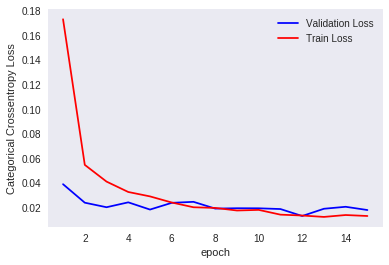

In [10]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### kernel size = (3, 3)

In [11]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.01892112844236176
Test accuracy: 0.9944


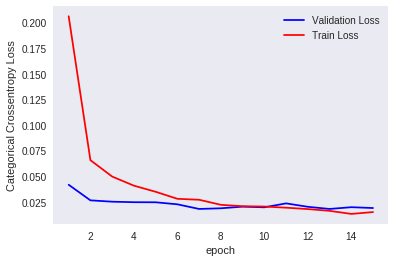

In [12]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Kernel size = (2, 2)

In [13]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02292553411611525
Test accuracy: 0.993


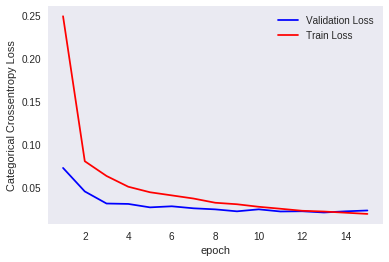

In [14]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##with 5 convolutional layers

###Kernel size = (5, 5)

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(183, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.023199425636067916
Test accuracy: 0.9934


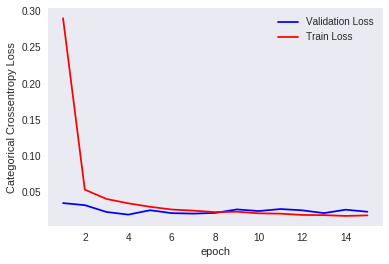

In [16]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### kernel size = (3, 3)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(183, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.018592901948341616
Test accuracy: 0.9954


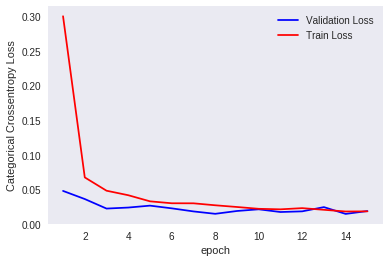

In [18]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Kernel size = (2, 2)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(183, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.018252224323329118
Test accuracy: 0.9944


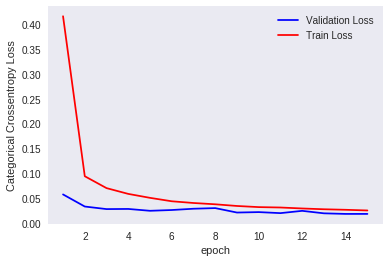

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## With 7 Convolutional layers

### kernel size = (5, 5)

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(183, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(356, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(425, (5, 5), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027654921674951812
Test accuracy: 0.9939


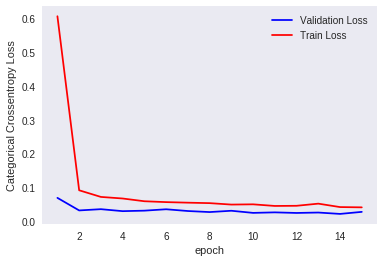

In [22]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### kernel size = (3, 3)

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(183, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(356, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(425, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02103127124365437
Test accuracy: 0.9943


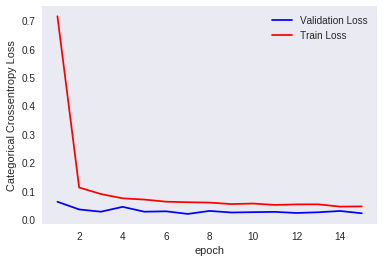

In [24]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

###Kernel size = (2, 2)

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(183, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(356, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(425, (2, 2), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022844080310964635
Test accuracy: 0.9922


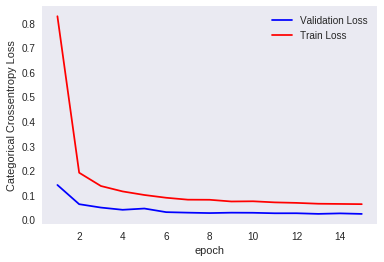

In [26]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Testing Model with best accuracy by removing Dropout layers between convolution layers.
  We got best accuracy using 5 depth convolutional layers each having a convolutional kernel size as (3X3). So we are going to perform the same model without Dropout to test how it will change with it.

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding='same',strides=(1,1),
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(183, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029016700168150056
Test accuracy: 0.9925


#Conclusion

1. We Developed models with **convolutional layers depth as [ 3 ,  5 ,  7 ] **each model is tested with **different kernel sizes [ (2, 2) , (3, 3) , (5, 5)].**

2. All these combinations are executed with both **Max Pooling and Dropout layers** added after each convolutional layer in the model.
3. Out of these 9 combinations, we got highest accuracy with **5 convolutional layers** depth and **kernel size of (3, 3)** and the **accuracy is ==> 99.54%** with a **loss ==> 0.01859290194.**

4. We also executed this top accurated model  **without Dropout** layer and found a decrease in Accuracy of the model by 0.0029%, Though it is a small increase but would reflect a large impact for large datasets.

